## Data Science

* Regression & prediction
* Machine Learning and Data Modeling
* Data Mining

#### Step One: Explore your data

When first starting out with a data set, it’s always a good idea to go through the data itself and see what you can already learn. The best way to do this is to make a lot of graphs and plots. Ensure you choose the correct plot type given your data. 

For example, if your data is categorical, it can be misleading to use a line graph, since lines will connect data points where there could never be any values in between. In this case, a bar plot is better.

E.g., let's say that I wanted to look at the means of five different features across all my existing categories of data (in this case, types of fruit)....

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fruits = np.array([[5.5,6.5,7.9,5.7,6.8,8.1],[5.1,3.4,6.5,8.8,6.3,4.9],[4.3,6.7,6.5,4.6,7.2,7.9]])
f = pd.DataFrame(fruits).transpose()
f.columns = (['apples','bananas','oranges'])
f

,apples,bananas,oranges
0,5.5,5.1,4.3
1,6.5,3.4,6.7
2,7.9,6.5,6.5
3,5.7,8.8,4.6
4,6.8,6.3,7.2
5,8.1,4.9,7.9


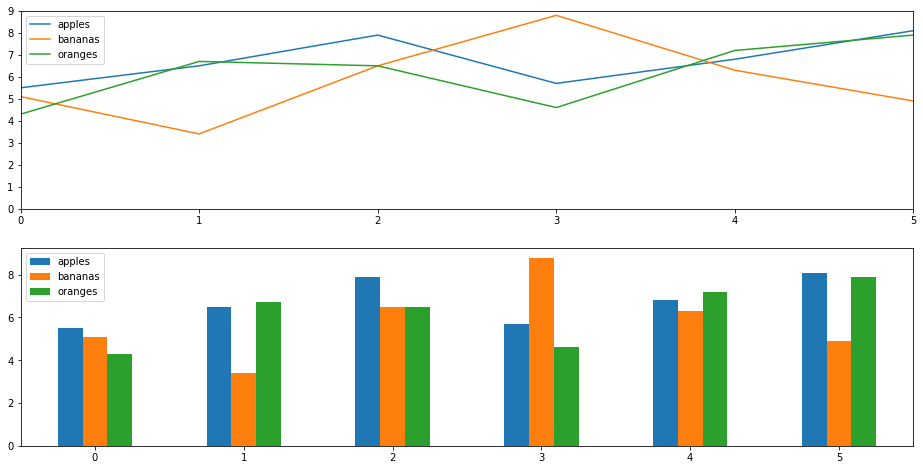

In [2]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
f.plot(ax=ax1, ylim=(0,9))
f.plot.bar(ax=ax2, rot=0) #By default pandas bar plot will put your x-labels on their sides. Use rot=0 to fix it.

By plotting your data in as many different ways as possible (that makes sense) and comparing values to look for features that may be strongly correlated, or data that might be highly variable, you can sometimes begin to see what features or attributes will be the most useful for solving a data science classification problem. (Note: this is not appropriate for hypothesis testing!!)

#### Samples and Targets

Let's say that we are trying to figure out what musical features best predicts a song's genre. Let's say we have 1000 songs. In this case, we want to *predict* the genre for each song. That means that our model needs to output (i.e. "guess") one value per **sample** where our sample is a song or music clip.

Because you have 1000 samples, you also therefore have 1000 **target** values. Each target's value, however, can only be the name of one genre. Let's say that we know in advance that we have five genre categories. In this case, each one of those 1000 target values will just one of five categorical genre labels.

#### Predictor Variables
Let's also say that for each song we have a mean ZCR, spectral centroid, mean spectral flux, and energy. Each one of these is called a **predictor variable**. A predictor variable is a variable used in statistical regression to help *predict* another variable. 

### Supervised and Unsupervised Learning

In **supervised learning**, we take a dataset containing a set of variables (features) and their target attributes (labels). When a dataset has target attributes labeled, these labels are referred to as **ground truth**. In supervised learning, the algorithm will "learn" the relation between training examples and their associated ground truth labels and apply that learned relationship to classify (i.e., "predict") entirely *new* inputs (without labels).

In **unsupervised learning**, however, there are no labels for the targets, so its goal is to infer the natural structure present within a set of data points.

N.B.: It can be misleading to use the word "learning" here, since it makes it seem like a magical process when it is entirely mathematical.

For your final projects, you will be working only with supervised learning models.

##### Supervised Learning

* Classification
* Regression

There are several common ways that supervised learning is approached and carried out. Commonly, you may hear of "classification" and "regression" models. Statistical regression is a mathematical approach for trying to predict one variable using one or more other variables. There are different *types* of regression depending on the type of data you are trying to predict (continuous or categorical) and the number of categories (e.g., is it binary or are there many categories?) 

Despite that "under the hood" all approaches are actually using similar probabilistic models, it is common to read about supervised learning where the goal is either to assign targets into *categories* ---known as a "classification" problem---or, the goal is to assign targets a value along a continuous scale---frequently described as a "regression" problem in reference to the most common type of regression: linear regression.

*Logistic* Regression is an algorithm that is used when the response or target variable is categorical. When the classification is binary, it is called *binomial* and when there are more than 2 categories it is called *multinomial*.

Thus, despite that we have these two terms, we can still *use* regression tools to carry out classification problems (more on this later).

**The idea behind ALL of these approaches is to try to find a relationship between measured features and the probability of particular outcome.**

The relationship that the algorithm "learns" between the combined set of features and an output label is then labeled **a "model."**

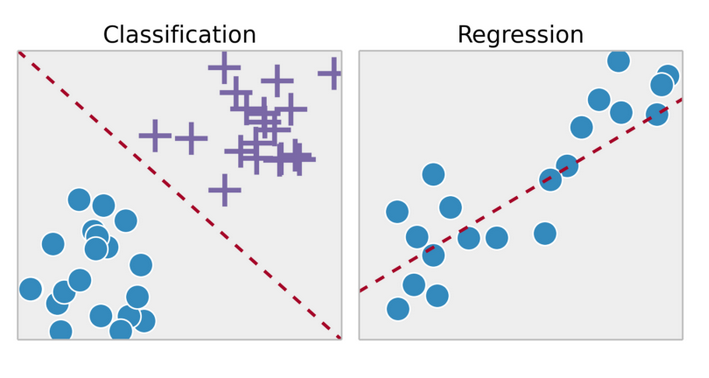

In [28]:
from IPython.display import Image
Image('../images/classification_regression.png', embed=True)

#### Unsupervised Learning

Unsupervised learning is effectively a tool for self-organization of data. Given some set of input features (say, color, shape, etc.) a model tries to group objects based on features that appeared to be shared. (See example image below).  

The most common task for unsupervised learning is clustering or classification when the optimal combination of features that distinguish the data are unknown *and* there are no labels for the data. Sometimes unsupervised learning is used to learn *about* the data. 

A great example for music is so-called "functional" chord analysis. There is a system in music theory where any chord can supposedly be labeled as either "T" (tonic), "P" (predominant), or "D" (dominant). However, maybe there is a more appropriate way of categorizing Roman numerals that better accounts for the way that chords behave? (Interested? See:  Music Theory Spectrum, Volume 40, Issue 2, Fall 2018, Pages 314–335O, https://doi.org/10.1093/mts/mty021)

**In all of these cases, we wish to learn the inherent structure of our data without using explicitly-provided labels or a predetermined number of "states".** Since no labels are provided, there is no specific way to compare model performance in most unsupervised learning methods.

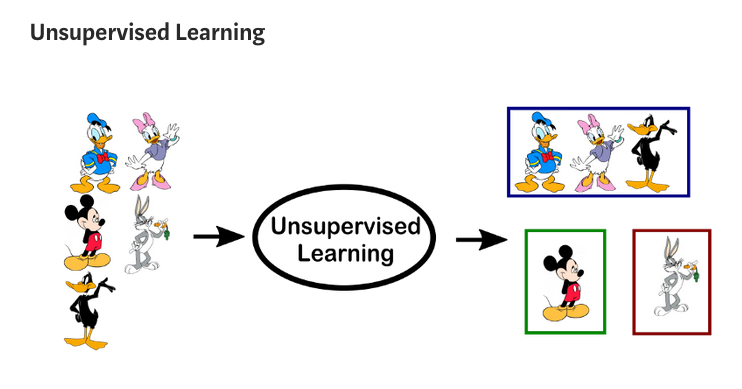

In [29]:
Image('../images/unsupervisedLearning.png', embed=True)

#### Splitting Your Data Into Training And Test Sets

To assess your model’s performance later, you will need to divide the data set into two parts: **a training set and a test set**. The first is used to find the best combination of parameters for predicting, while the second is used to evaluate (or test the accuracy of) the learned or trained system.

You will need to divide your data **before** you start training your model. 

The most common splitting choice is to take between 2/3 and 3/4 of your original data set as the training set, while the remainder will be left aside and will compose the test set.

#### Back to supervised learning
Since “correct” output is determined entirely from the labels in the ground truth (i.e., our model assumes ground truth is "Truth"), noisy or incorrect data labels will clearly reduce the effectiveness of your model. Ground truth data labels are rarely perfect in real-world situations (especially for music!). E.g., we may have a clip with the key labeled "Eb" but there is a modulation within the clip that goes to the key of D.

For this course's final projects, you will have ground truth for all datasets, so we will be using a so-called "supervised learning" approach. 

When computing any kind of regression (or classification) model, the main considerations are:

* the complexity of the model
* the generalizability of the model

where those two factors are related. The complexity of a model refers to *how many parameters* are used altogether to make the final prediction. Using our Disney example, a complex model might rely on ALL recorded features (e.g., fur color, foot color, ear shape, beak presence, gesture pose, etc.) Generally speaking, the more complex the model, the more it will only work (or "generalize") with data that looks near-identical to the data you trained it on, and therefore it will not predict well when it sees new data. In other words, the model is learning to produce your training data without learning the actual trends or structure in the data that leads to the desired classification output. This effect is called **overfitting**.  This problem is very hard to avoid when you have a small dataset.

#### Scikit-learn

We will make use of several functions and features from the `scikit-learn` python package, which should have already been installed with everything at the beginning of the course.

Check if you already have it by entering `import sklearn` in a jupyter notebook. If it can't find the package then you'll need to install (contact me for details).

But the question is, how do you split the data? It is best to split the data in a random manner, which means you won't be good at doing it yourself (not to mention that is time consuming). To help us with this task, the `scikit` library provides a tool, called the Model Selection library. There’s a function in the library called `model_selection.train_test_split()`. Using this we can easily split the dataset into the training and the testing datasets in various proportions.

### Model Types

You will likely read about many *types* of machine learning tools and models for classification and clustering. Since explaining these approaches is beyond the scope of this class, AND we are not concerned with accuracy but rather a proof-of-concept implementation, we will simply stick with simple regression models for this class. (In other words, if you read online about things like *"SVMs", "random forsests",* or *"neural networks"* you can simply know for now that that these are all different methods for optimizing a classification model, but you shouldn't attempt to use one of them in your final projects without consulting me first.